<div class="alert alert-info"><b>Import Libraries<b>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import pickle
from matplotlib.patches import Rectangle
import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info"><b>Load node df function<b>

In [2]:
def load_point_data(point_id):
    infile = open(f"{point_id}.pkl", 'rb')
    df = pickle.load(infile)
    infile.close()
    return (df)

In [3]:
def create_anomaly_df(point_id):

    point_df = load_point_data(
        f'./Data_with_anomalies/{point_id}_data_with_anomalies')
    point_df = point_df[[
        'EC', 'PH', 'ORP', 'TEMPERATURE', 'ALL_DIMS_mp', 'ALL_DIMS_if',
        'auto encoder Anomaly', 'ALL_DIMS_eif'
    ]]

    point_df = point_df.reset_index()
    point_df.set_index('DateTime', inplace=True)

    point_df[[
        'ALL_DIMS_mp', 'ALL_DIMS_if', 'auto encoder Anomaly', 'ALL_DIMS_eif'
    ]] = point_df[[
        'ALL_DIMS_mp', 'ALL_DIMS_if', 'auto encoder Anomaly', 'ALL_DIMS_eif'
    ]].apply(np.ceil)

    point_df = point_df.rename(
        columns={
            'ALL_DIMS_mp': 'MP',
            'ALL_DIMS_if': 'IF',
            'ALL_DIMS_eif': 'EIF',
            'auto encoder Anomaly': 'AUTO ENCODER'
        })
    point_df = point_df.replace(0.0, np.nan)

    return point_df

In [4]:
def plot_multi_variant_anomalies(point_df):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,
                                             figsize=(int(point_df.shape[0]/200), 8),
                                             gridspec_kw={'hspace': 0.01},
                                             sharex=True)
    fig.suptitle(f'Anomaly Detection\n', fontsize='30')

    ax1.plot(point_df['EC'])
    ax1.set_ylabel('EC', fontsize='8')

    ax2.plot(point_df['PH'])
    ax2.set_ylabel('PH', fontsize='8')

    ax3.plot(point_df['ORP'])
    ax3.set_ylabel('ORP', fontsize='8')

    ax4.plot(point_df['TEMPERATURE'])
    ax4.set_ylabel('TEMPERATURE', fontsize='8')
    ax4.set_xlabel('Date', fontsize='15')

    window_color = {
        'AUTO ENCODER': 'red',
        'EIF': 'lightgreen',
        'IF': 'lightskyblue',
        'MP': 'gold'
    }

    rect_legend = []
    for model in ['AUTO ENCODER', 'EIF', 'IF', 'MP']:
        indx = point_df.loc[point_df[model] == 1].index
        for i in indx:
            # Create rectangle x coordinates
            startTime = i - datetime.timedelta(minutes=5 * 12)
            endTime = startTime + datetime.timedelta(minutes=5 * 24)

            # convert to matplotlib date representation
            start = mdates.date2num(startTime)
            end = mdates.date2num(endTime)
            width = end - start

            # Plot rectangle
            rect1 = Rectangle((start, 0),
                              width,
                              6000,
                              color=window_color[model])
            rect2 = Rectangle((start, 0), width, 15, color=window_color[model])
            rect3 = Rectangle((start, -400),
                              width,
                              700,
                              color=window_color[model])
            rect4 = Rectangle((start, 0), width, 30, color=window_color[model])

            ax1.add_patch(rect1)
            ax2.add_patch(rect2)
            ax3.add_patch(rect3)
            ax4.add_patch(rect4)
        rect_legend.append(rect1)

    plt.legend(rect_legend, ['AUTO ENCODER', 'EIF', 'IF', 'MP'],
               bbox_to_anchor=(0, 2))
    plt.show()

    # Anomalies plots
    for model in ['AUTO ENCODER', 'EIF', 'IF', 'MP']:
        df = point_df.reset_index()
        indx = df.loc[df[model] == 1].index
        temp = indx[0]
        for i, num in enumerate(indx):
            if indx[i] > temp + 12:

                fig, (ax1, ax2, ax3,
                      ax4) = plt.subplots(4,
                                          figsize=(14, 4),
                                          gridspec_kw={'hspace': 0},
                                          sharex=True)
                fig.suptitle(
                    f"{model} Anomaly at {df['DateTime'].iloc[num].date()}\n",
                    fontsize='14')

                ax1.plot(point_df['EC'][num - 12:num + 13], color='deeppink')
                ax1.set_ylabel('EC', fontsize='8')
                ax1.patch.set_facecolor(window_color[model])
                ax1.patch.set_alpha(0.05)

                ax2.plot(point_df['PH'][num - 12:num + 13], color='teal')
                ax2.set_ylabel('PH', fontsize='8')
                ax2.patch.set_facecolor(window_color[model])
                ax2.patch.set_alpha(0.05)

                ax3.plot(point_df['ORP'][num - 12:num + 13], color='navy')
                ax3.set_ylabel('ORP', fontsize='8')
                ax3.patch.set_facecolor(window_color[model])
                ax3.patch.set_alpha(0.05)

                ax4.plot(point_df['TEMPERATURE'][num - 12:num + 13],
                         color='mediumorchid')
                ax4.set_ylabel('TEMPERATURE', fontsize='8')
                ax4.set_xlabel('Date', fontsize='15')
                ax4.patch.set_facecolor(window_color[model])
                ax4.patch.set_alpha(0.1)
                temp = indx[i]
                plt.tight_layout()
                plt.show()

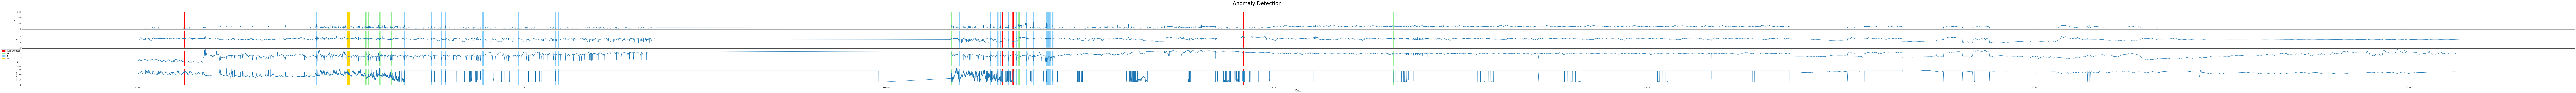

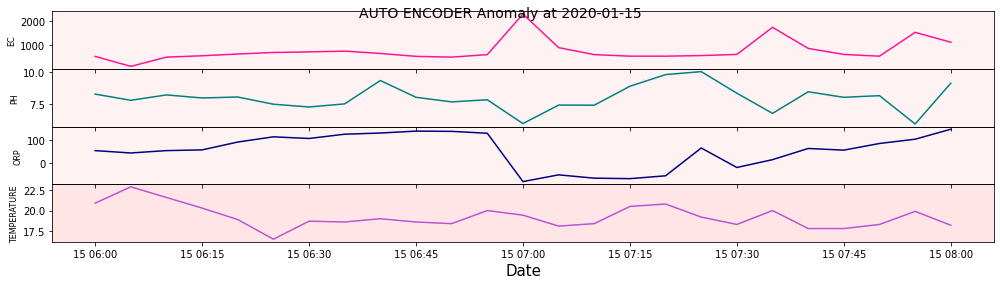

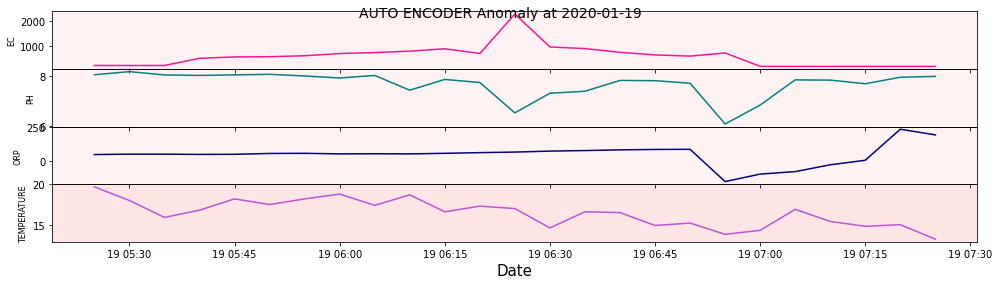

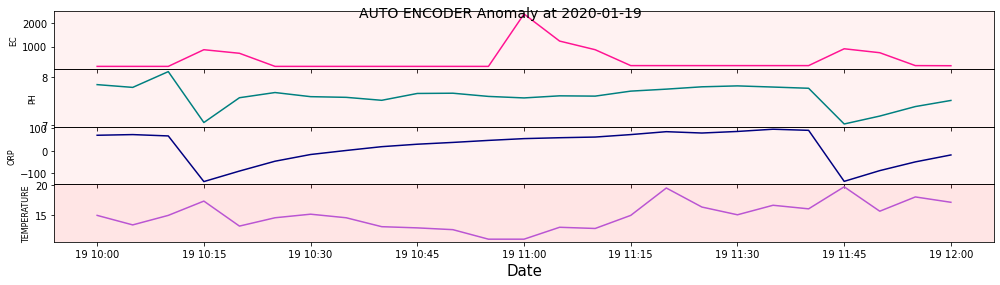

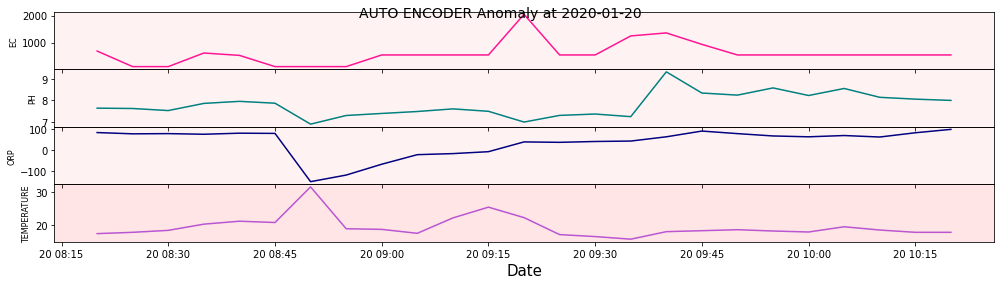

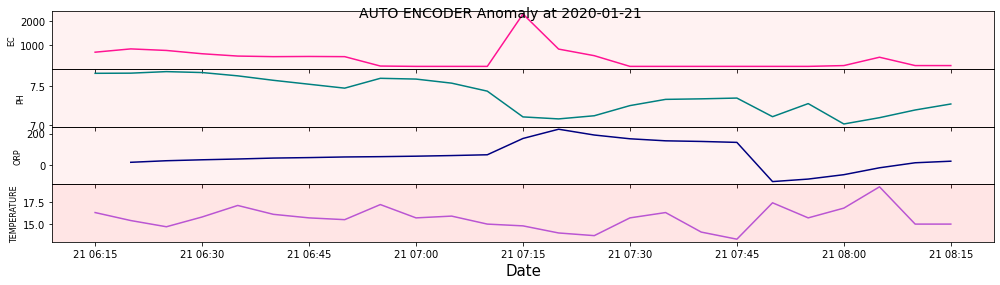

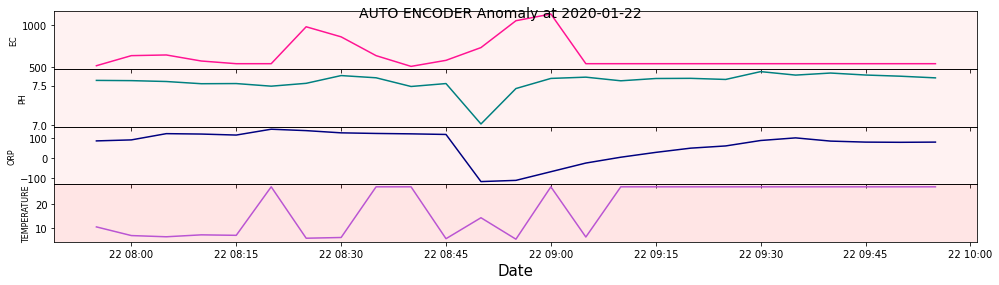

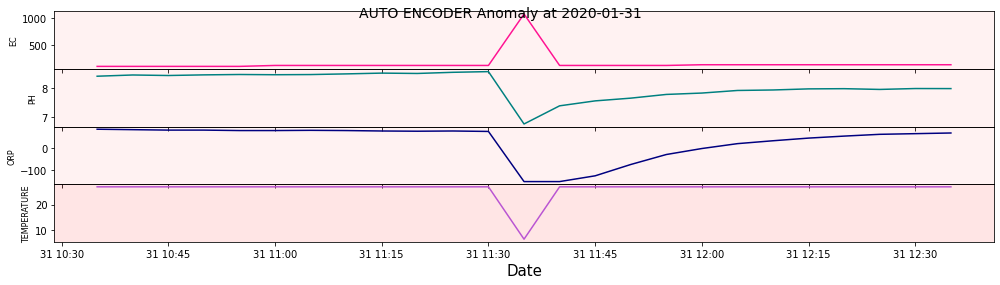

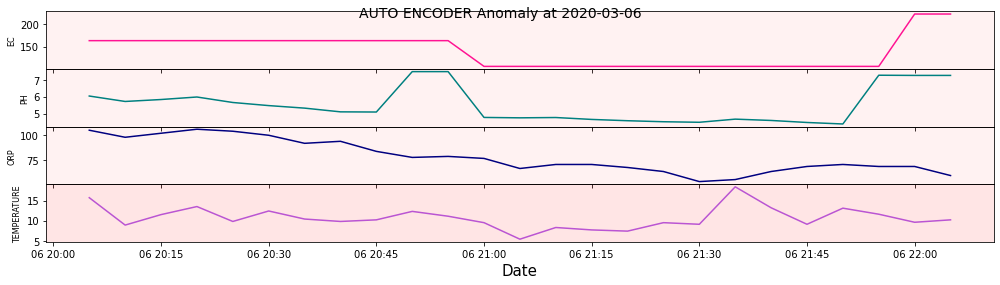

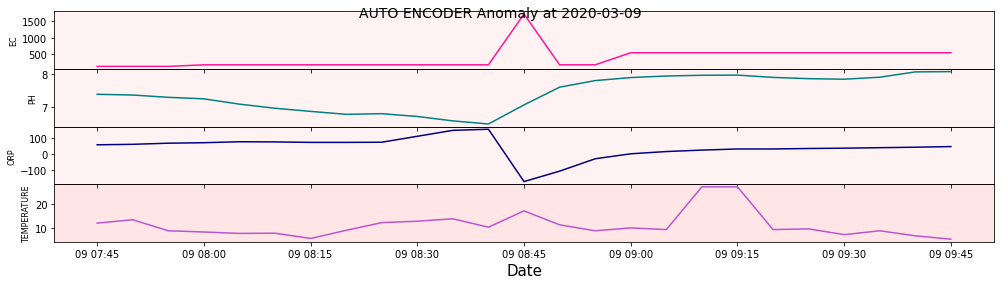

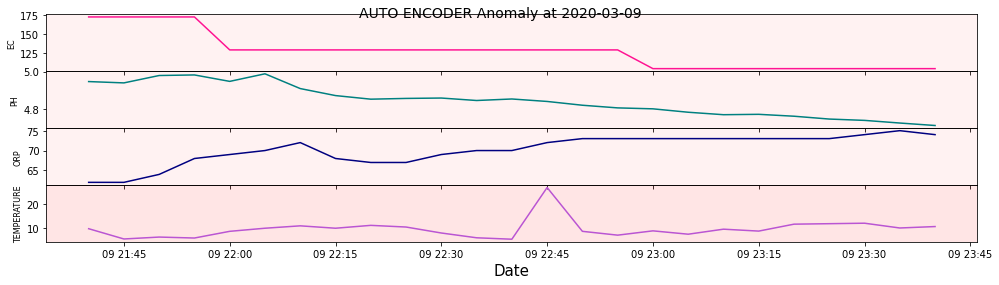

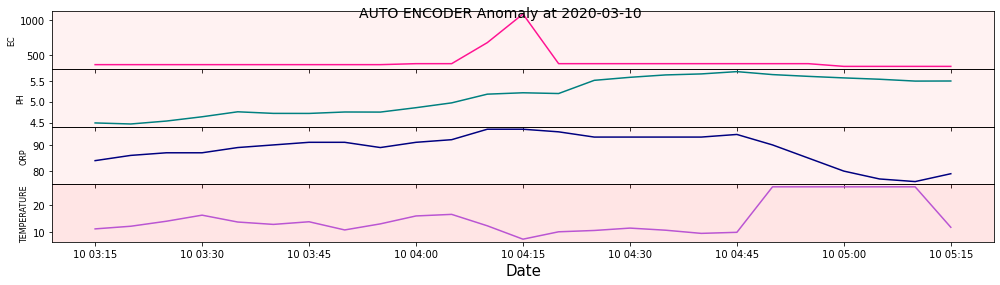

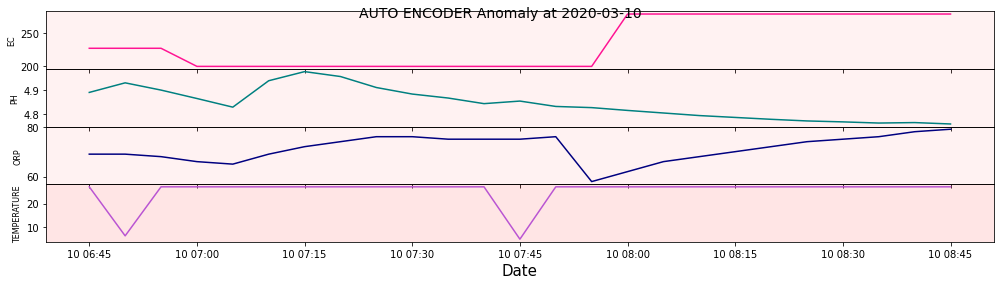

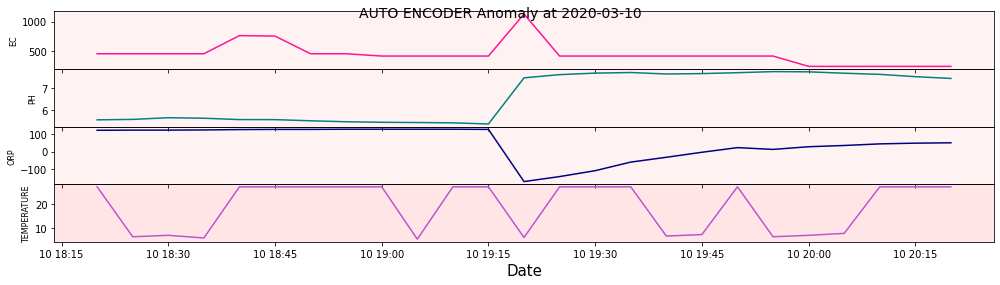

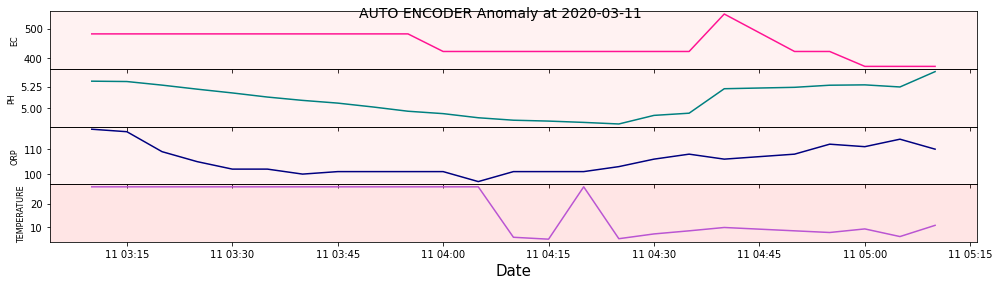

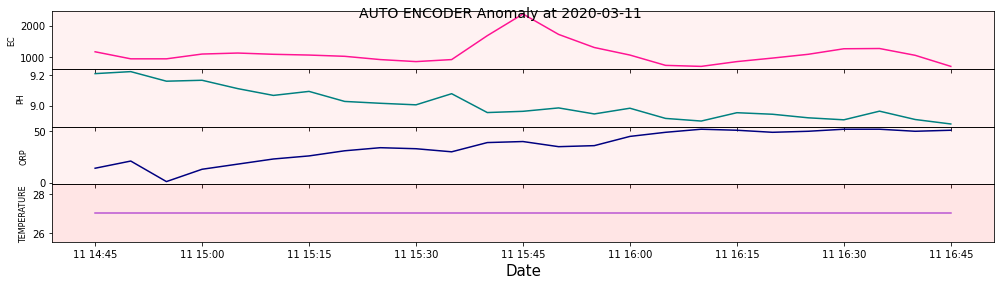

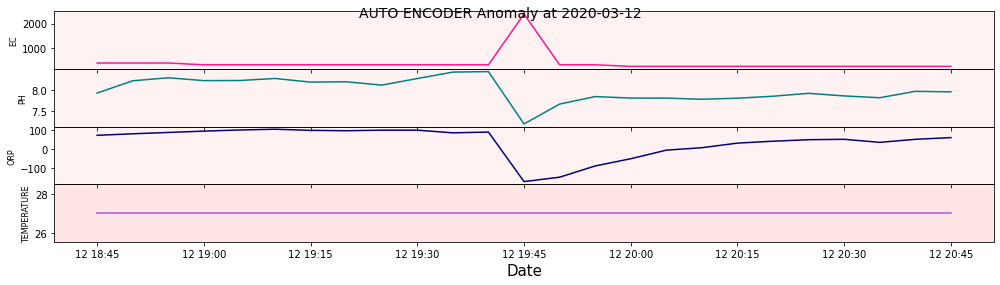

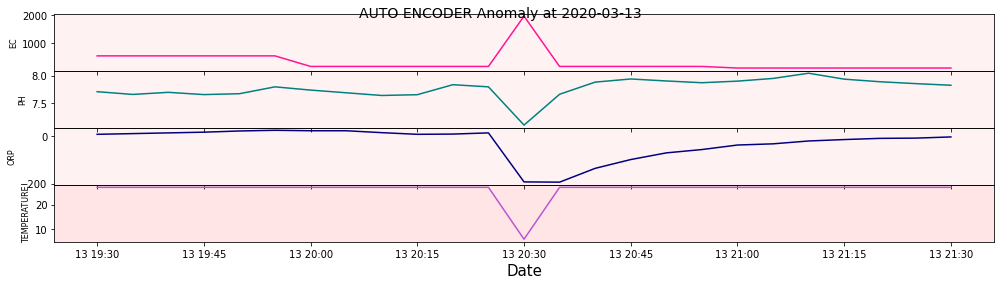

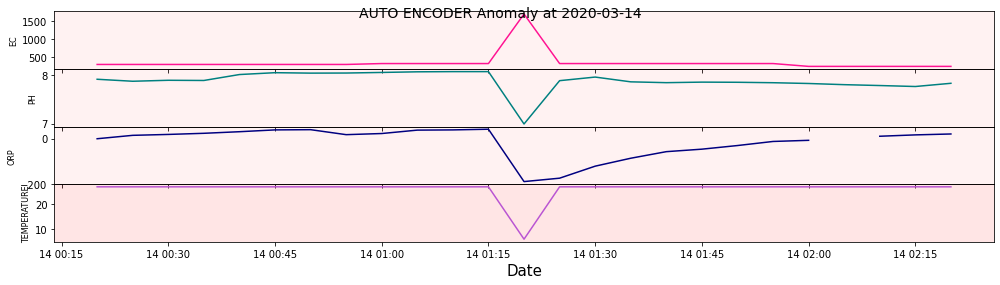

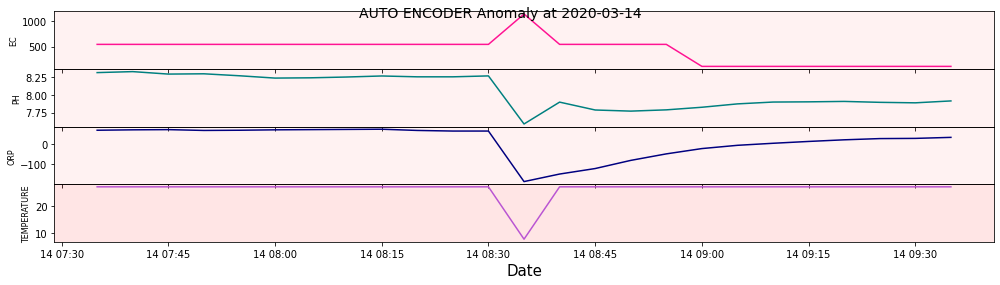

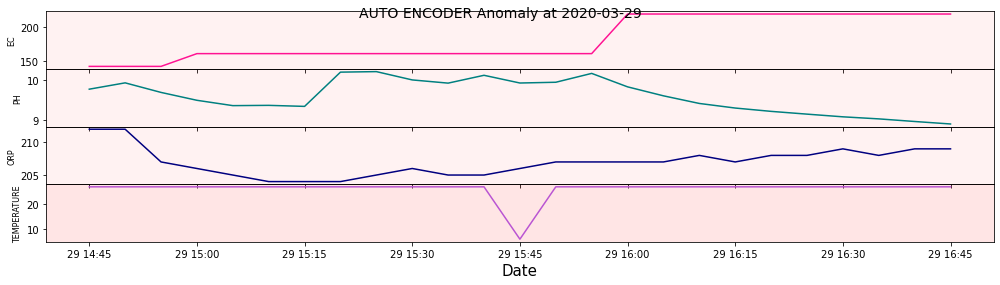

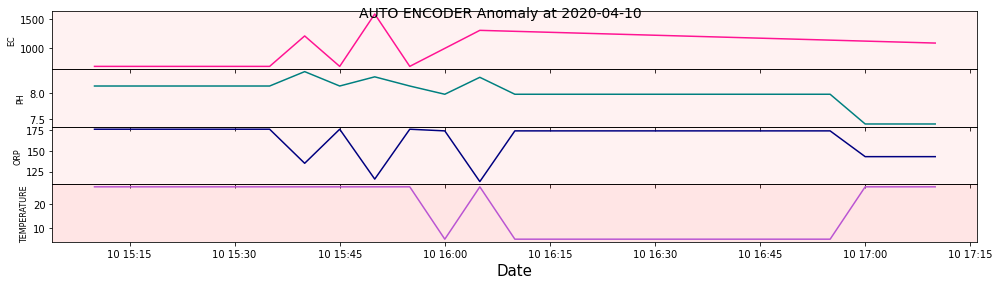

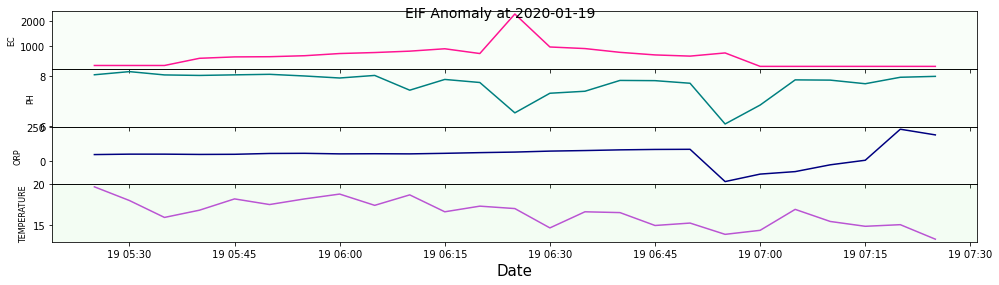

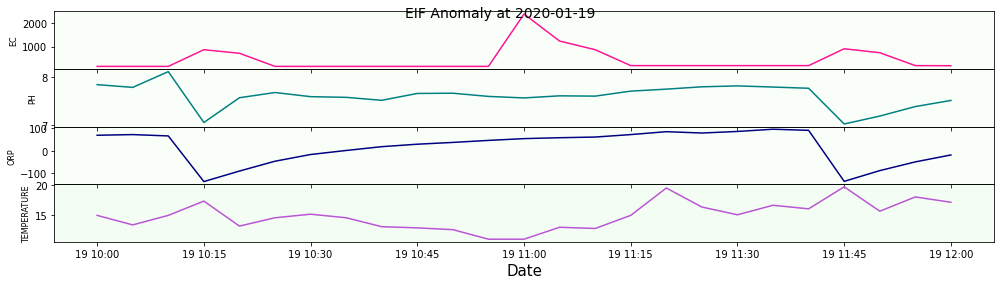

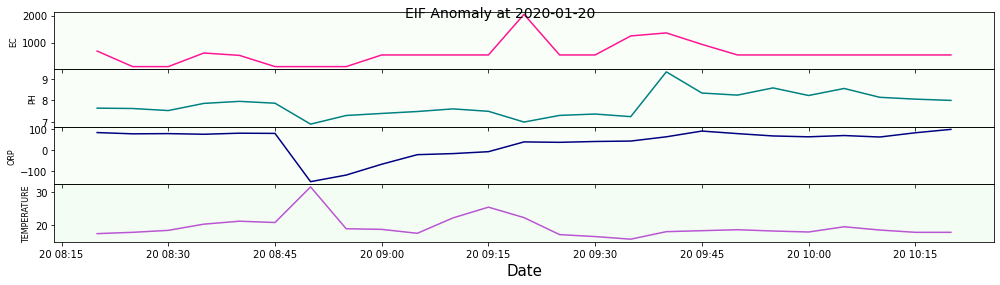

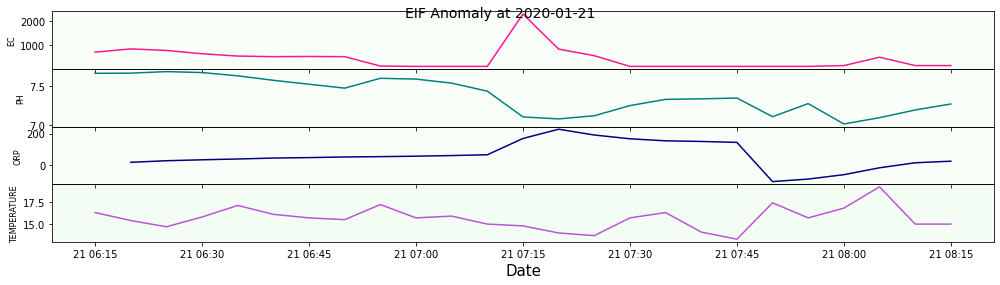

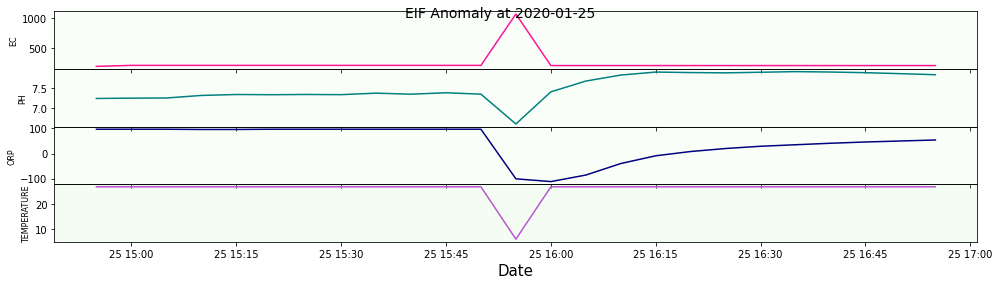

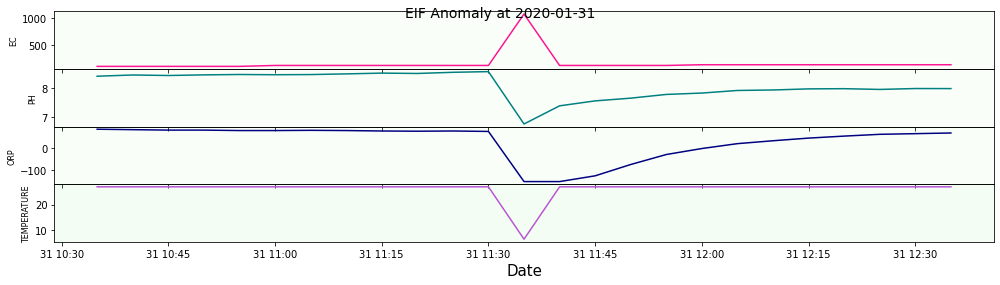

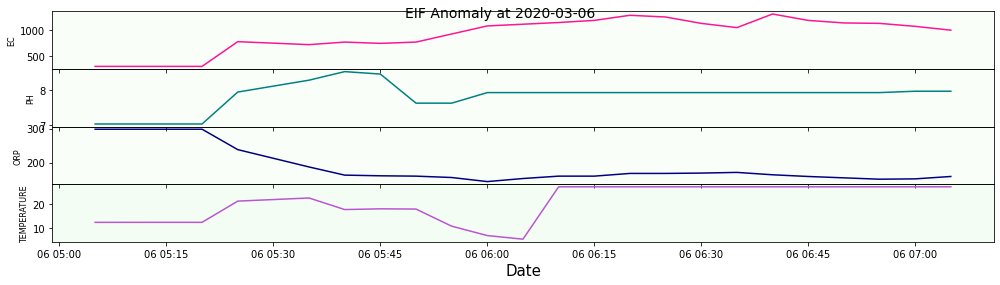

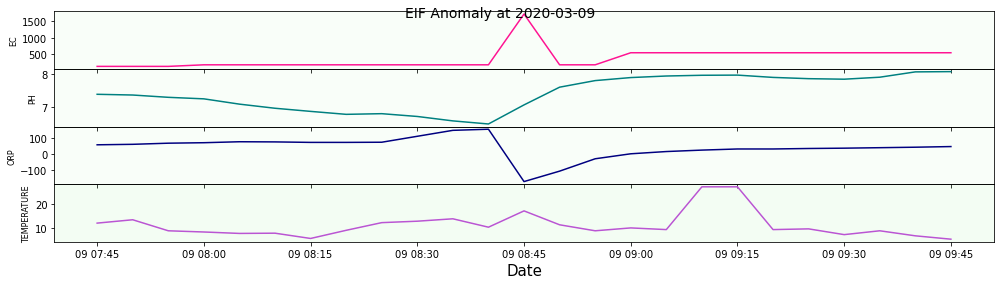

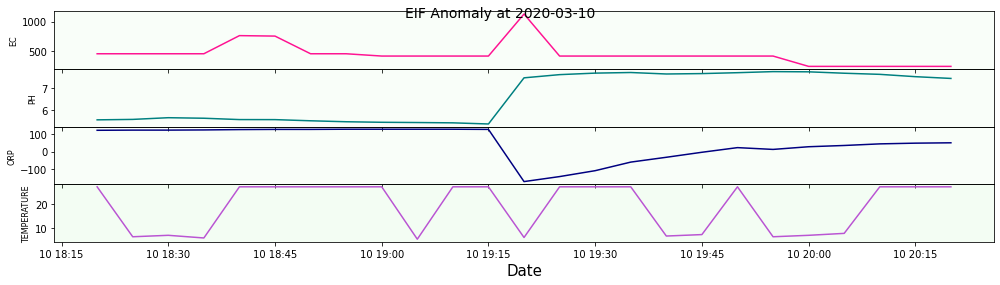

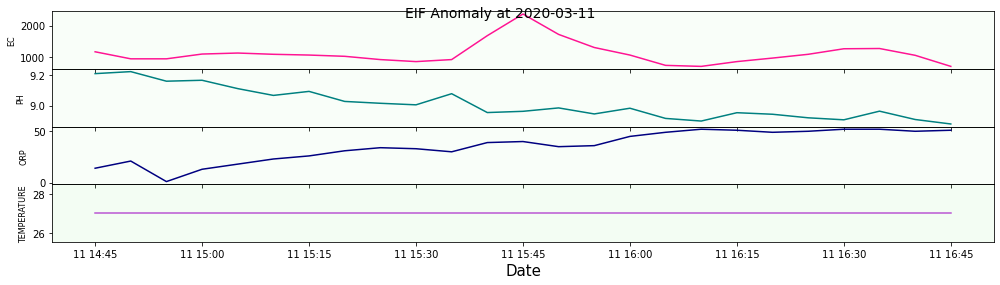

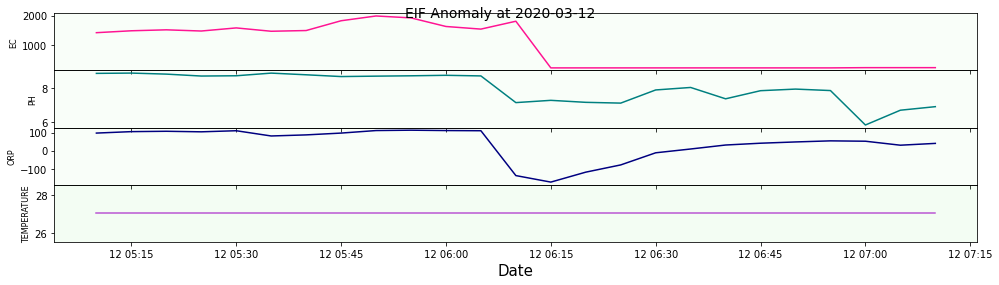

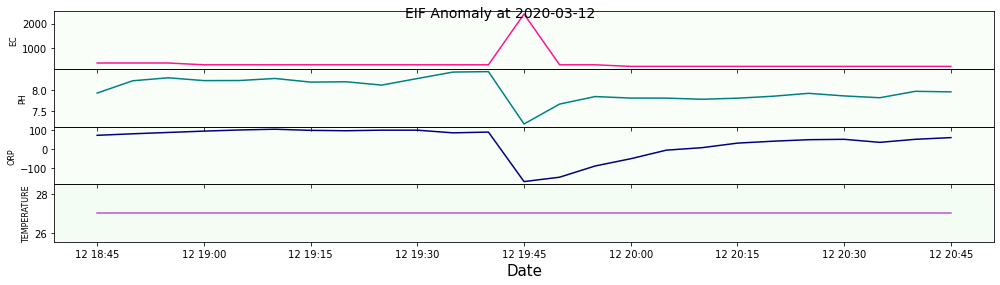

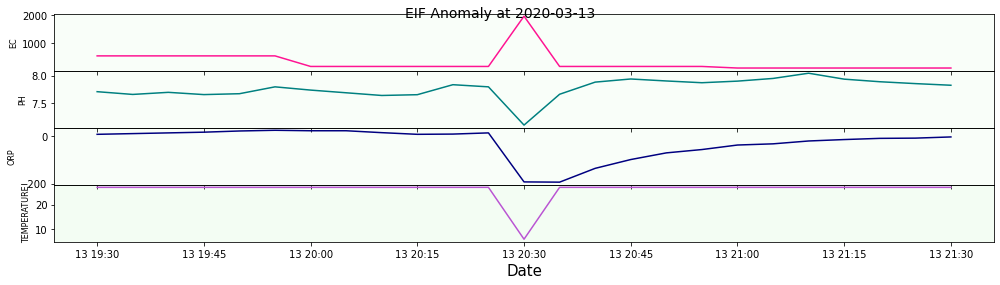

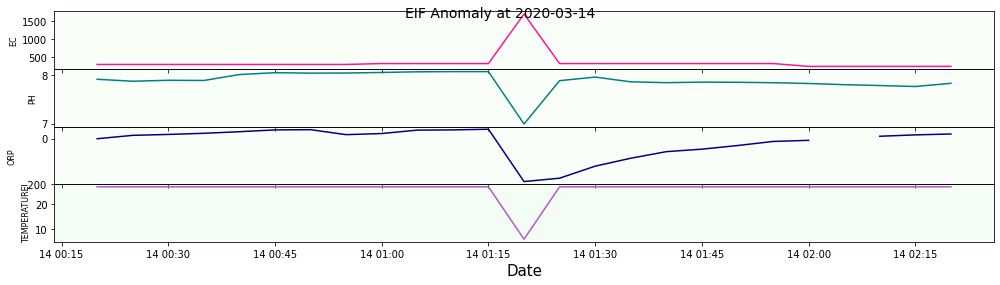

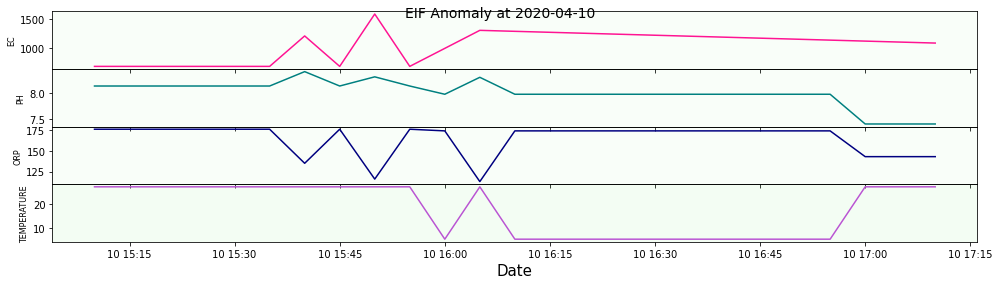

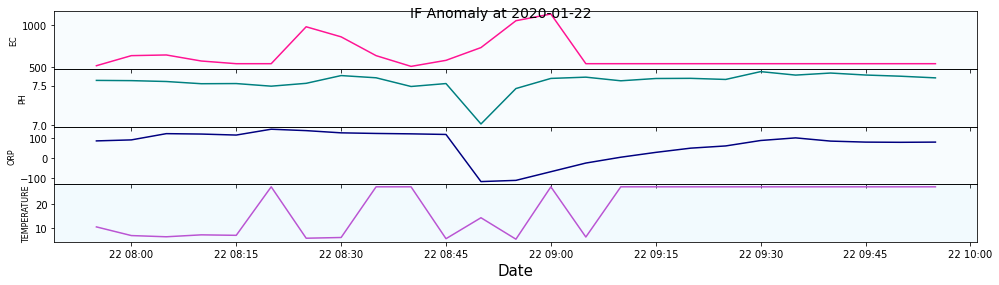

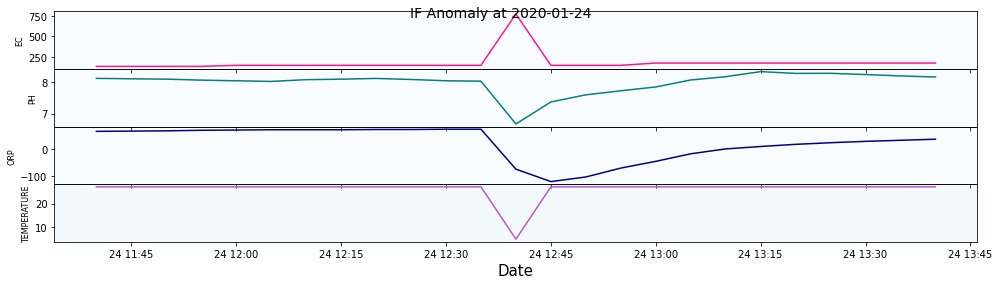

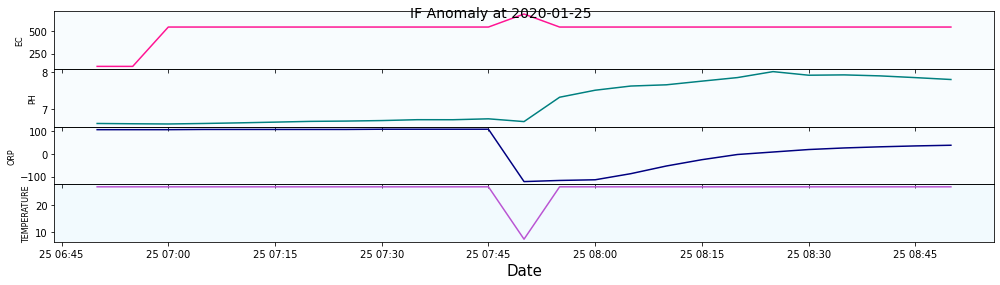

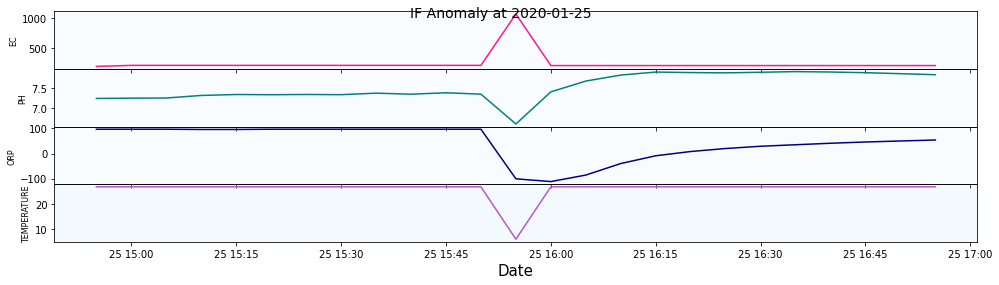

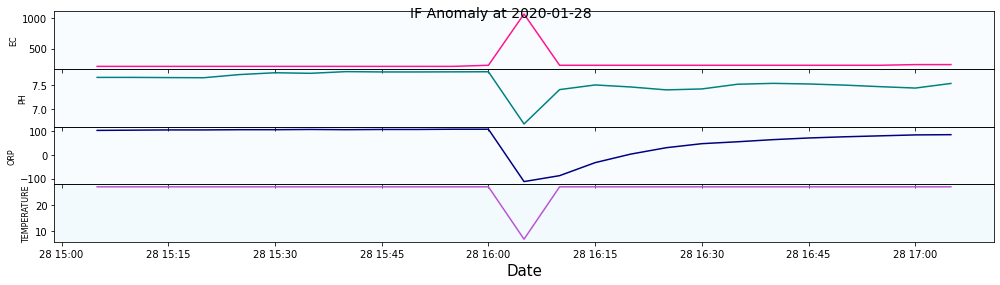

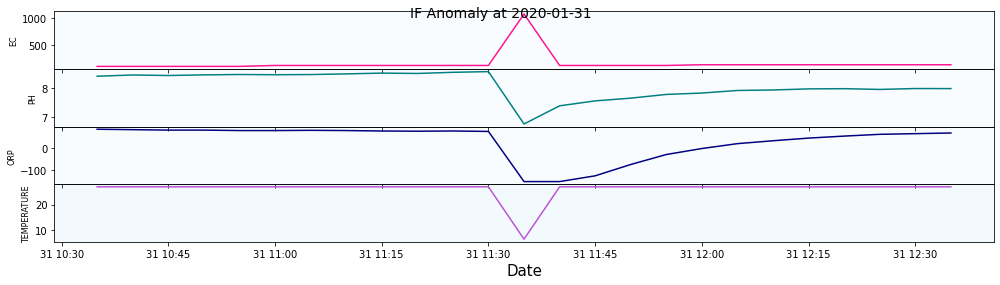

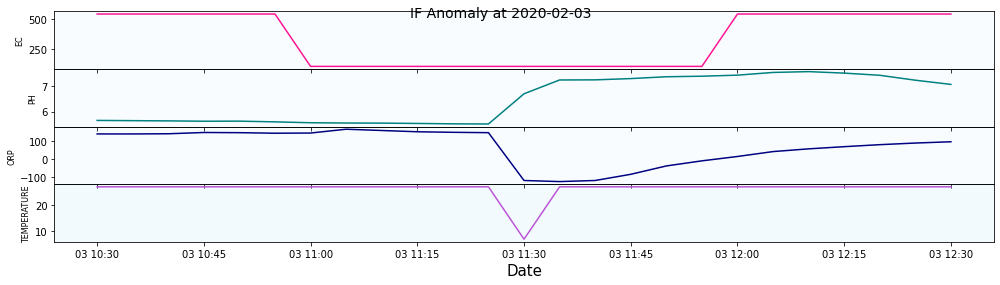

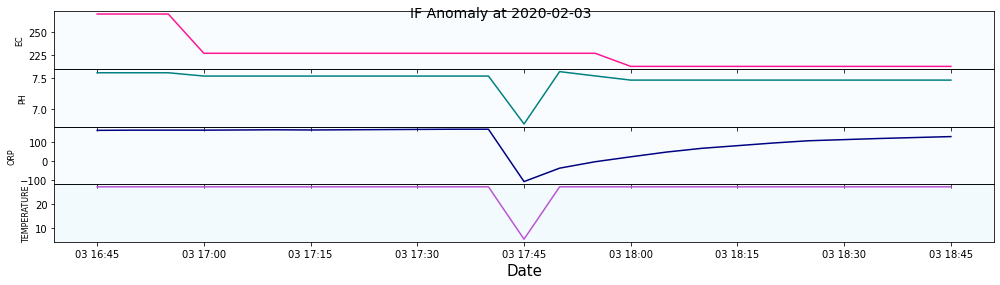

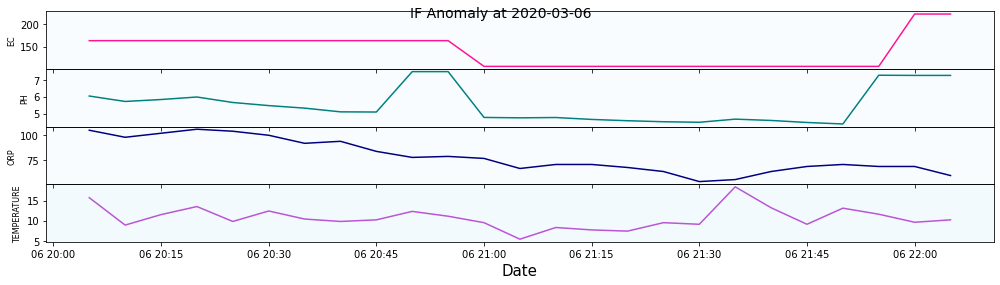

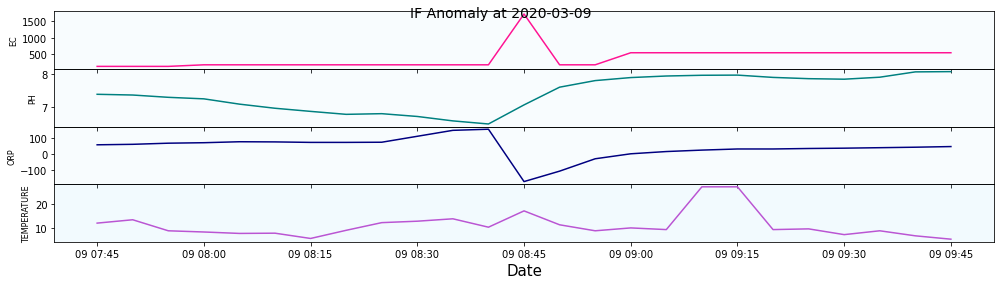

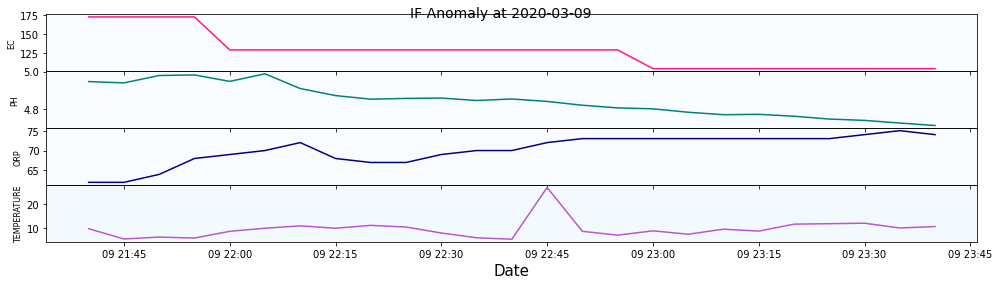

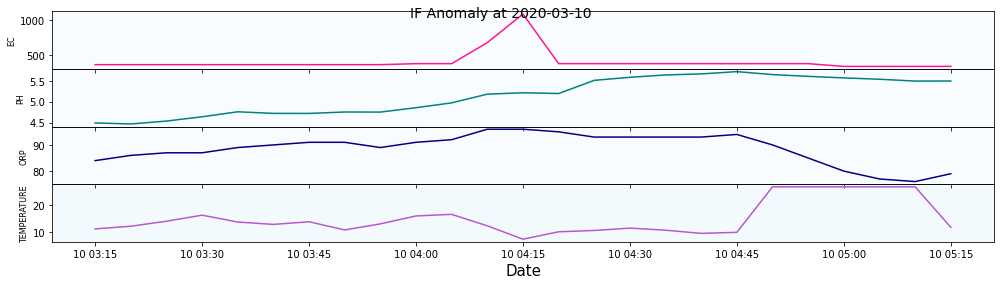

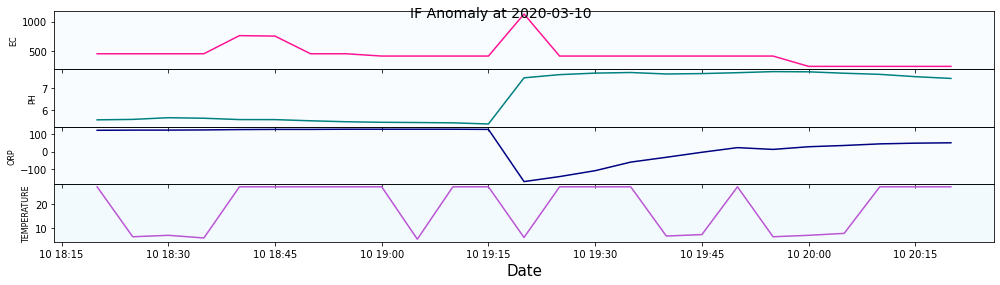

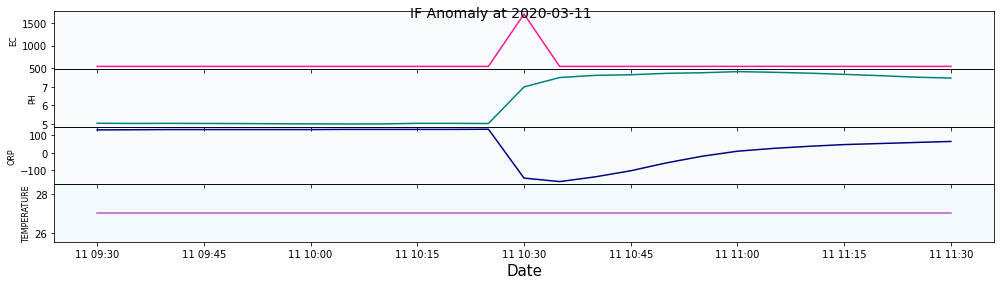

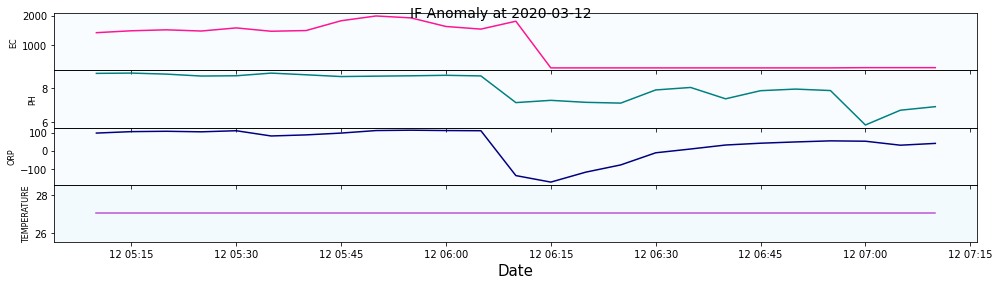

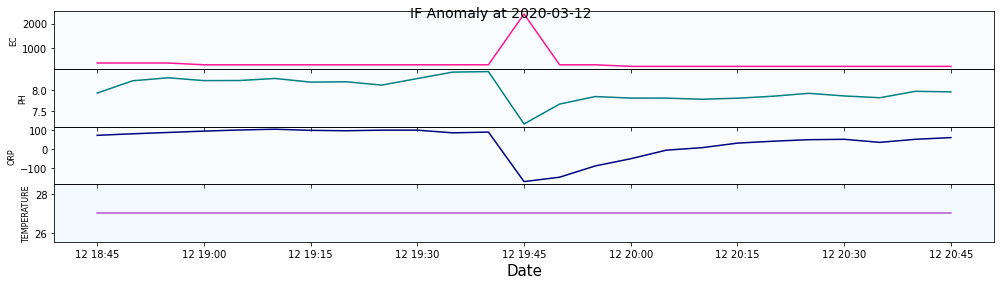

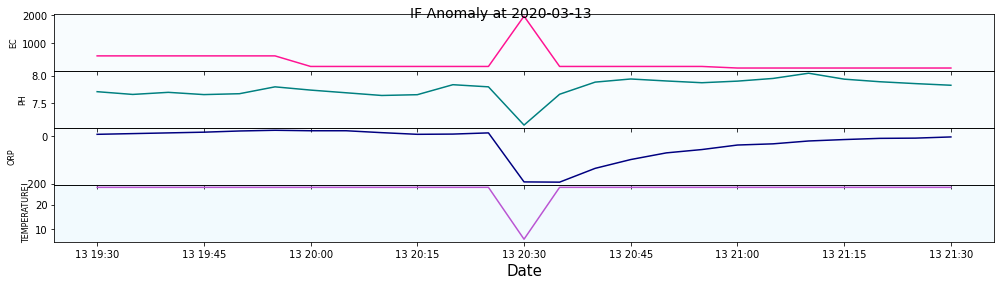

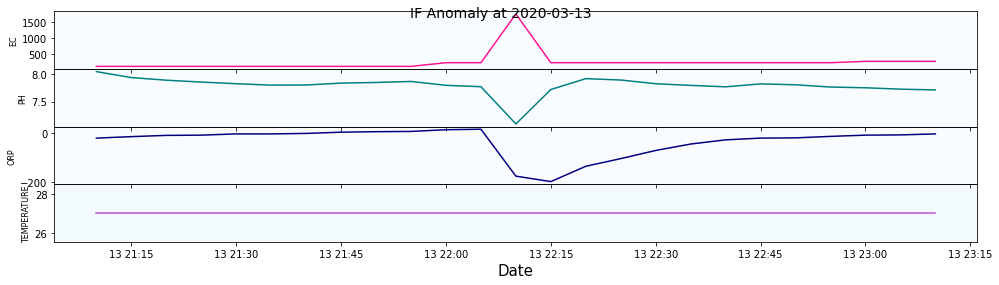

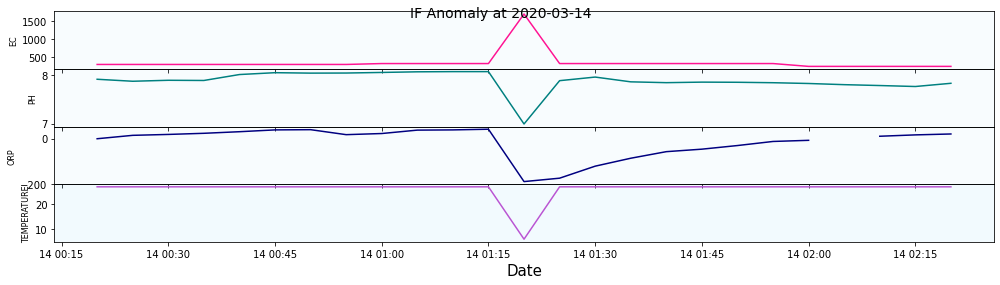

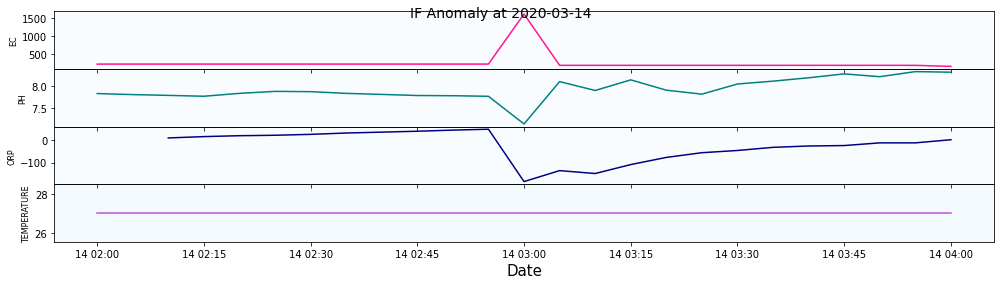

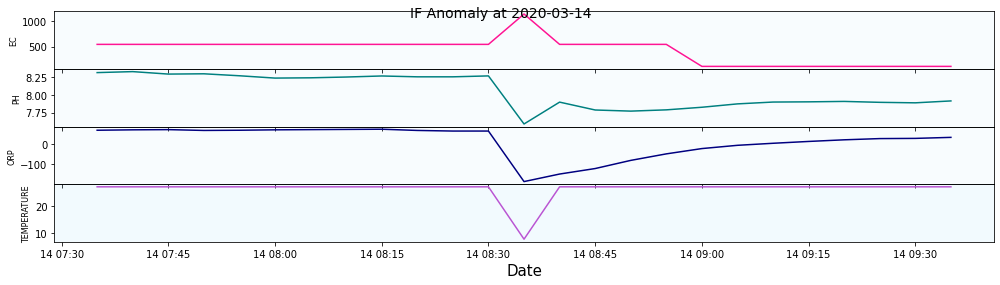

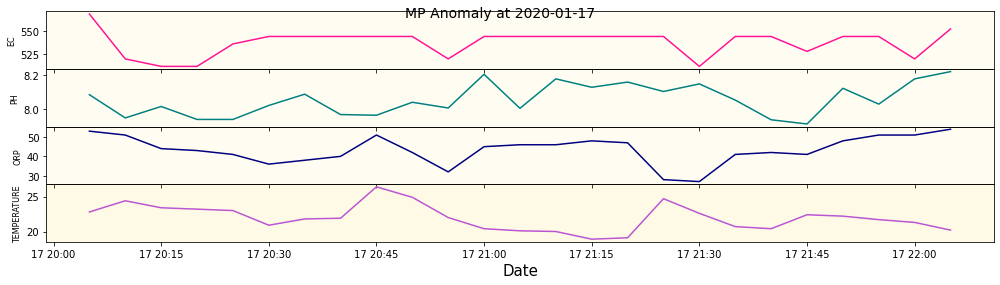

In [5]:
point_df = create_anomaly_df(911)
plot_multi_variant_anomalies(point_df)